In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score, accuracy_score
from sklearn.svm import LinearSVC, SVC

In [3]:
# df = pd.read_csv("shopping_behavior_updated.csv")
df = pd.read_csv("/content/drive/MyDrive/AML_Project/Consumer Behavior and Shopping Habits/shopping_behavior_updated.csv")

In [4]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


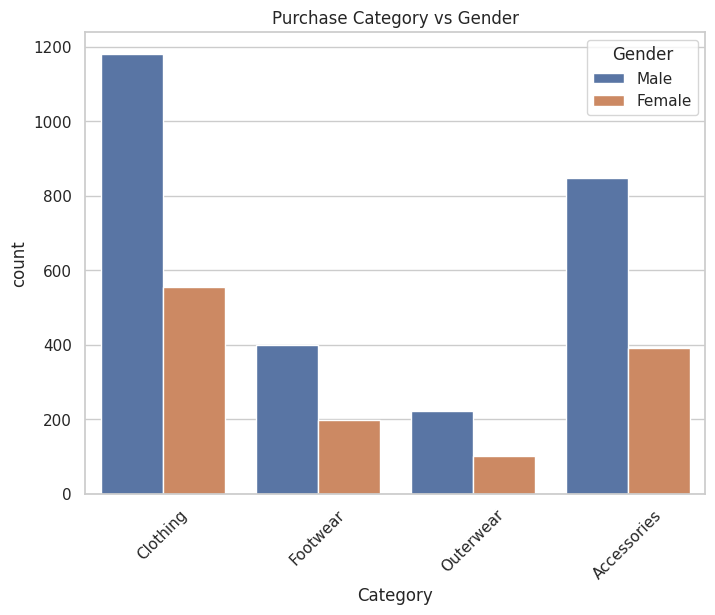

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x="Category", hue="Gender", data=df)
plt.title('Purchase Category vs Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()



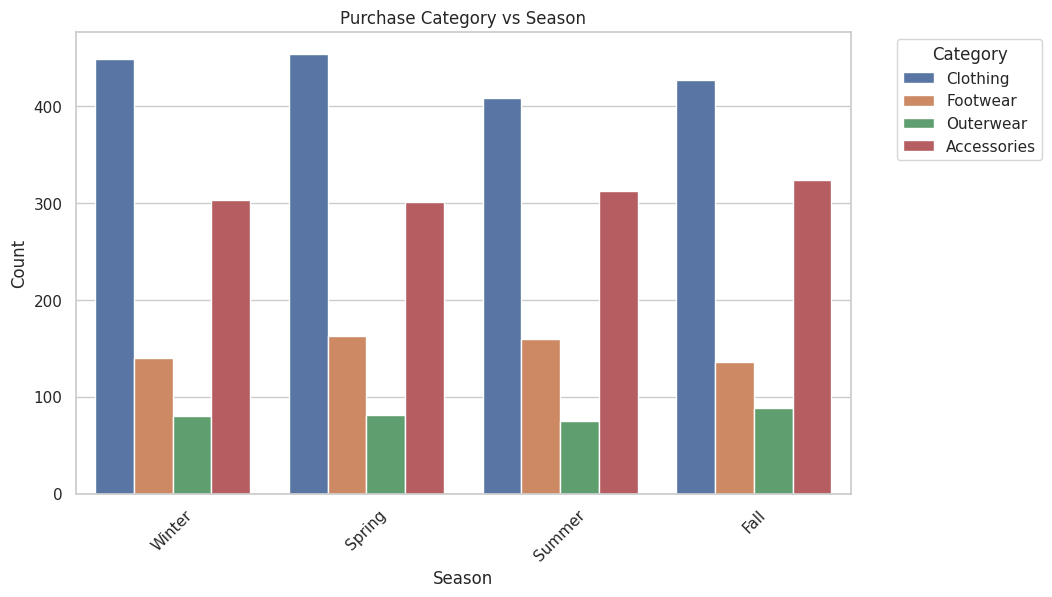

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Season", hue="Category", data=df)
plt.title('Purchase Category vs Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


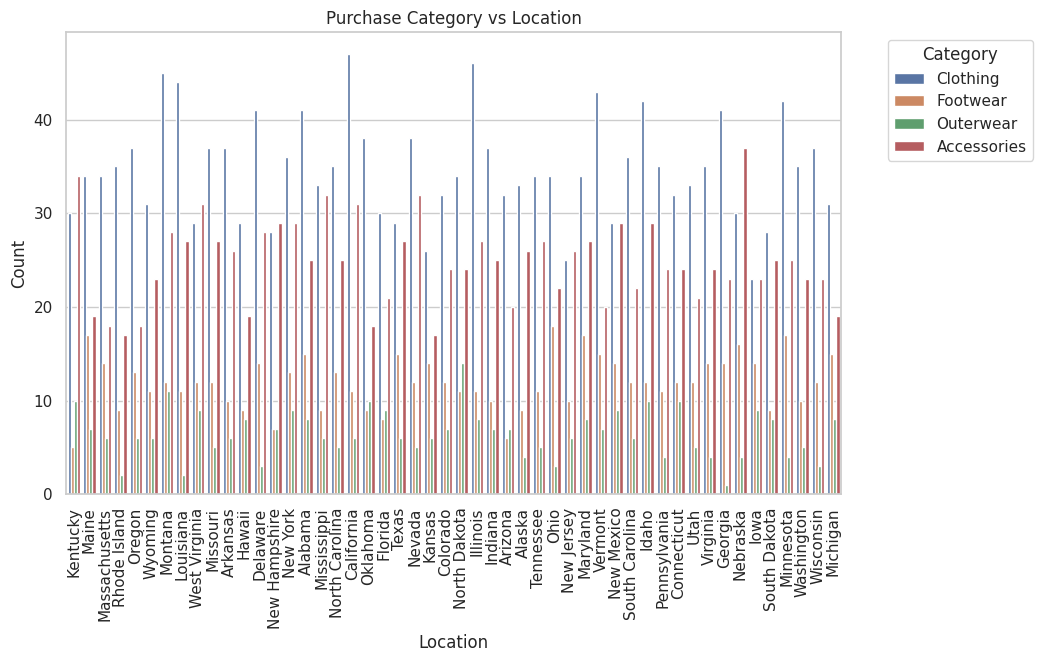

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Location", hue="Category", data=df)
plt.title('Purchase Category vs Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

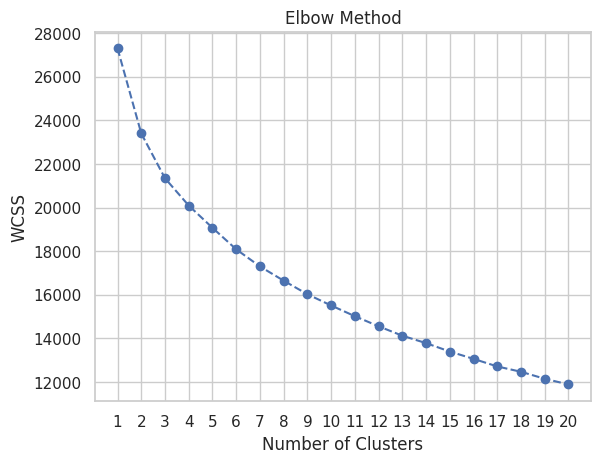

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

cluster_df = df
features = ['Age', 'Gender', 'Purchase Amount (USD)', 'Location', 'Color', 'Season', 'Item Purchased']

le = LabelEncoder()
for feature in features:
    if cluster_df[feature].dtype == 'object':
        cluster_df[feature] = le.fit_transform(cluster_df[feature])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df[features])

wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 21))
plt.show()

In [31]:

optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(scaled_data)
print(cluster_df[['Customer ID', 'Cluster']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Customer ID  Cluster
0               1        2
1               2        1
2               3        1
3               4        1
4               5        2
...           ...      ...
3895         3896        0
3896         3897        0
3897         3898        0
3898         3899        0
3899         3900        0

[3900 rows x 2 columns]


In [21]:
cluster_df[cluster_df['Cluster'] == 1]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Cluster
1,2,19,1,23,Clothing,64,18,L,12,3,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,1
2,3,50,1,11,Clothing,73,20,S,12,1,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1
3,4,21,1,14,Footwear,90,38,M,12,1,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,1
6,7,63,1,16,Clothing,85,25,M,7,0,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly,1
8,9,26,1,4,Outerwear,97,47,L,19,2,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2645,25,1,13,Clothing,83,30,M,21,1,3.3,No,Standard,No,No,4,Bank Transfer,Every 3 Months,1
2645,2646,23,1,15,Accessories,81,17,L,13,1,4.0,No,Store Pickup,No,No,24,Bank Transfer,Bi-Weekly,1
2646,2647,33,1,24,Clothing,56,30,S,10,2,3.9,No,Next Day Air,No,No,4,Debit Card,Every 3 Months,1
2647,2648,60,1,17,Footwear,58,39,M,18,2,3.3,No,2-Day Shipping,No,No,25,Debit Card,Annually,1


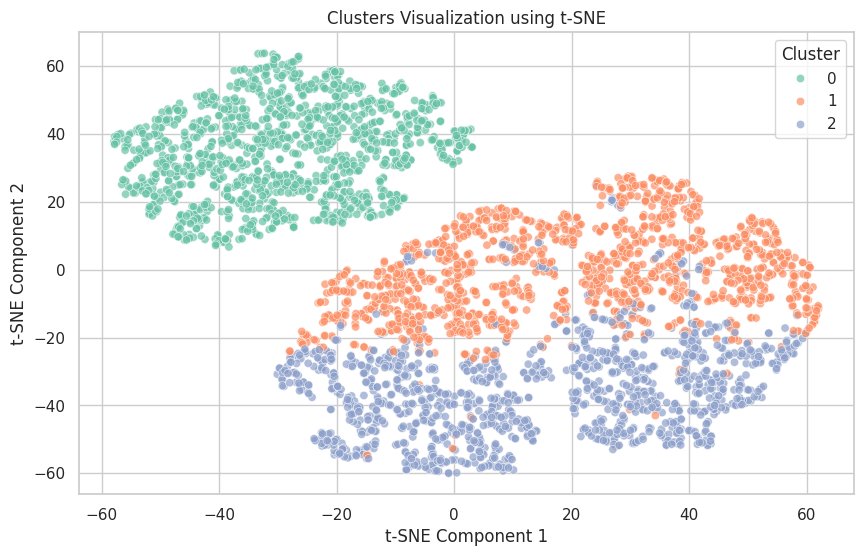

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(scaled_data)

tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])

tsne_df['Cluster'] = cluster_df['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Clusters Visualization using t-SNE')
plt.legend(title='Cluster')
plt.show()


<ipython-input-11-858fbd9f144f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster_df, x='Cluster', palette='Set2')


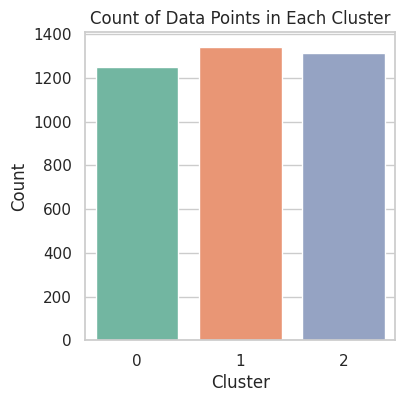

In [11]:
plt.figure(figsize=(4, 4))
sns.countplot(data=cluster_df, x='Cluster', palette='Set2')
plt.title('Count of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


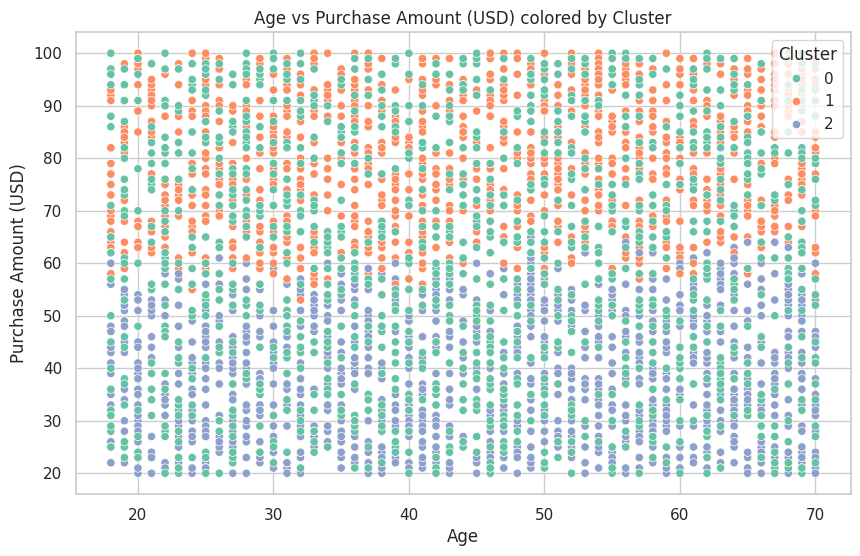

<ipython-input-34-52c2013bd9c6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cluster_df, x='Cluster', y='Purchase Amount (USD)', palette='Set2')


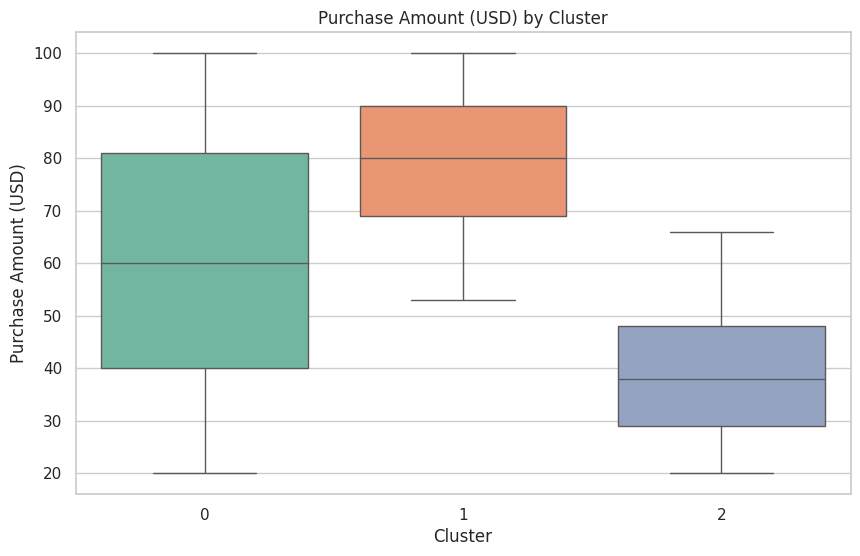

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_df, x='Age', y='Purchase Amount (USD)', hue='Cluster', palette='Set2')
plt.title('Age vs Purchase Amount (USD) colored by Cluster')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=cluster_df, x='Cluster', y='Purchase Amount (USD)', palette='Set2')
plt.title('Purchase Amount (USD) by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# plt.figure(figsize=(8, 6))
# sns.countplot(data=cluster_df, x='Gender', hue='Cluster', palette='Set2')
# plt.title('Count of Gender by Cluster')
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.show()

<ipython-input-13-c071ef4203cc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=cluster_df, x='Cluster', kind='count', col='Location', palette='Set2', col_wrap=3, col_order=cluster_df['Location'].unique()[:5])


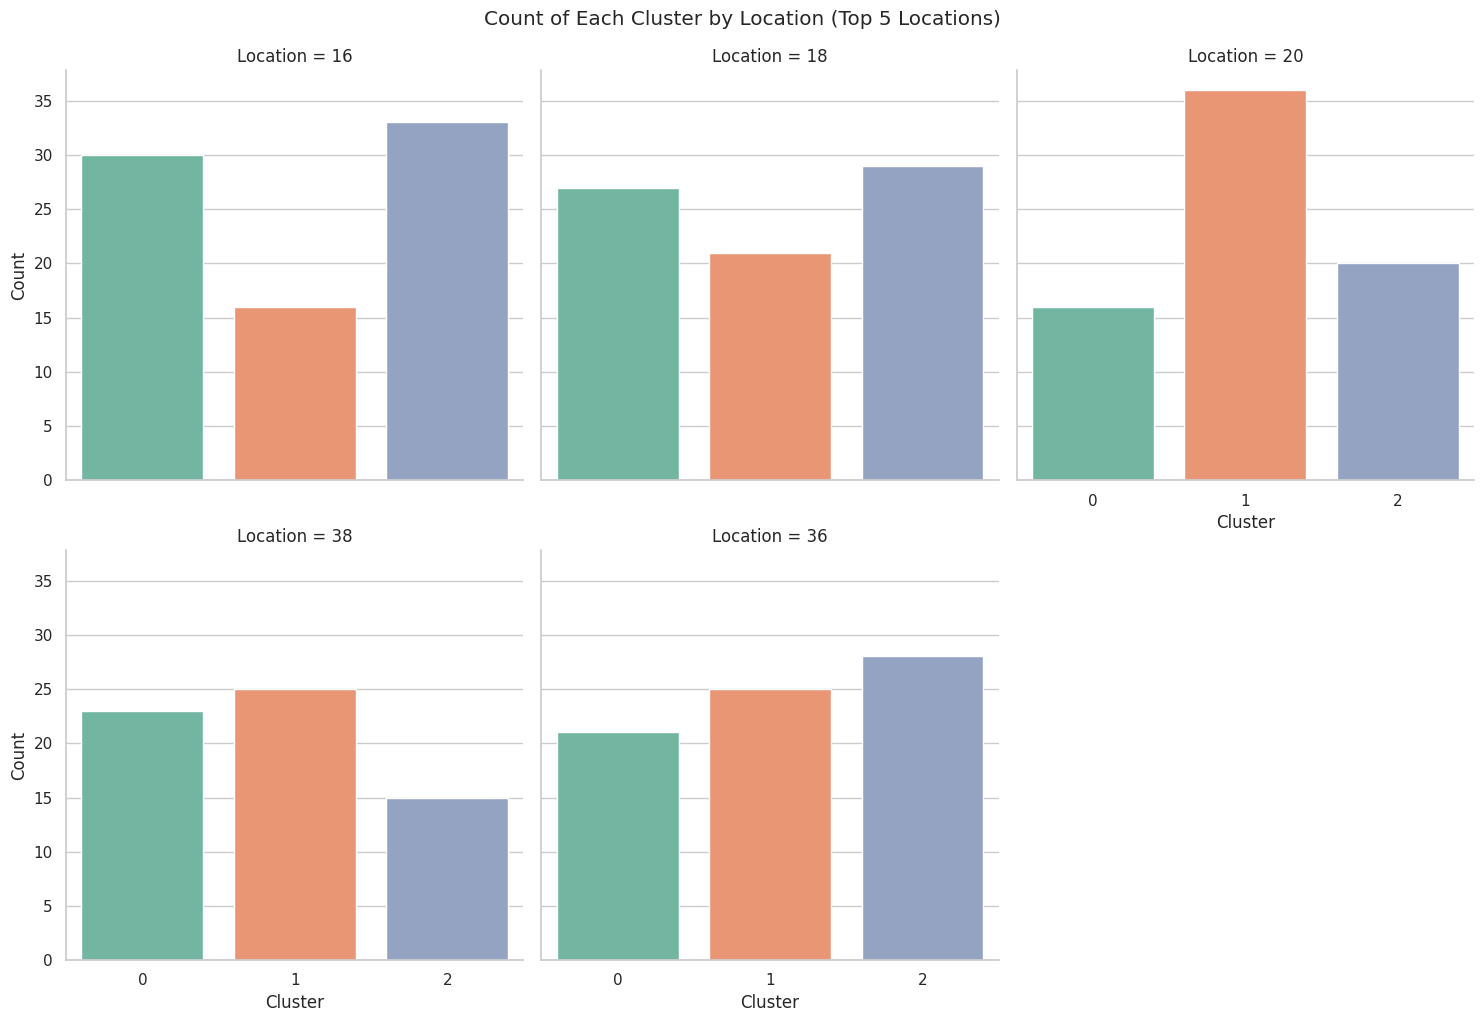

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(data=cluster_df, x='Cluster', kind='count', col='Location', palette='Set2', col_wrap=3, col_order=cluster_df['Location'].unique()[:5])
g.set_axis_labels('Cluster', 'Count')
g.fig.suptitle('Count of Each Cluster by Location (Top 5 Locations)', y=1.02)
plt.show()


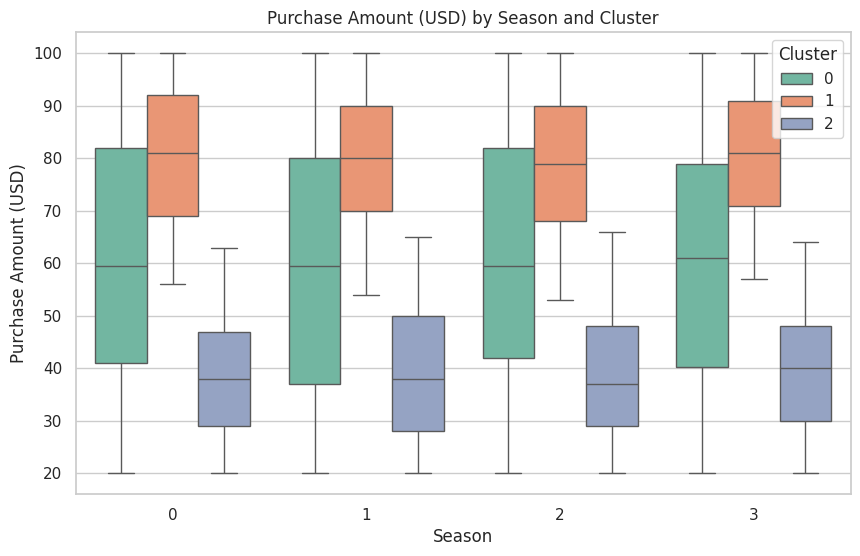

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cluster_df, x='Season', y='Purchase Amount (USD)', hue='Cluster', palette='Set2')
plt.title('Purchase Amount (USD) by Season and Cluster')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.show()


<ipython-input-15-2339679caef3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=cluster_df, x='Cluster', kind='count', col='Item Purchased', palette='Set2', col_wrap=3, col_order=cluster_df['Item Purchased'].unique()[:5])


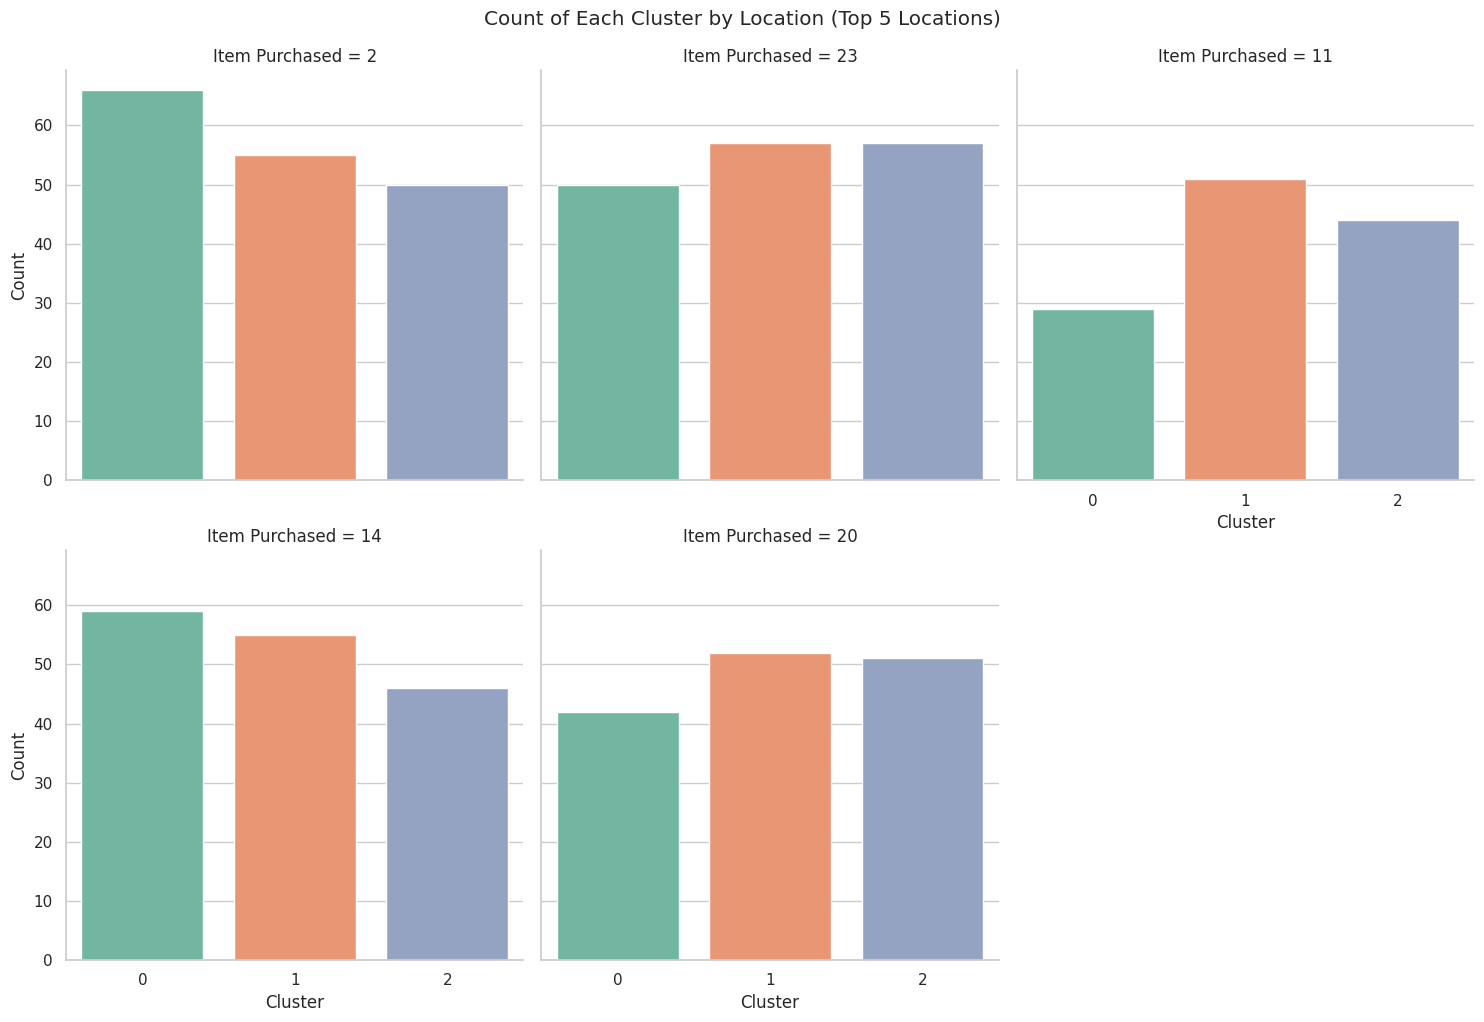

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


g = sns.catplot(data=cluster_df, x='Cluster', kind='count', col='Item Purchased', palette='Set2', col_wrap=3, col_order=cluster_df['Item Purchased'].unique()[:5])
g.set_axis_labels('Cluster', 'Count')
g.fig.suptitle('Count of Each Cluster by Location (Top 5 Locations)', y=1.02)
plt.show()


<ipython-input-16-ac4ff1a082b3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=cluster_df, x='Cluster', kind='count', col='Season', palette='Set2', col_wrap=2)


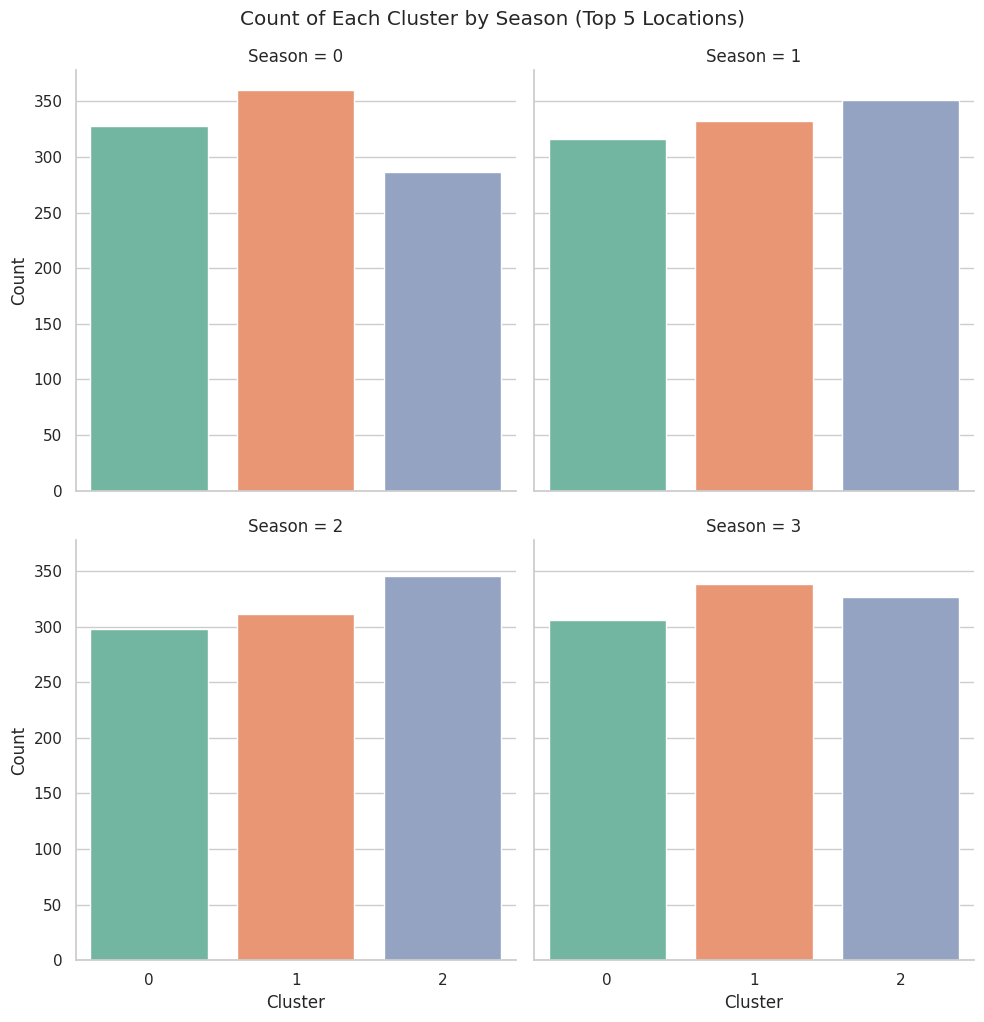

In [16]:
g = sns.catplot(data=cluster_df, x='Cluster', kind='count', col='Season', palette='Set2', col_wrap=2)
g.set_axis_labels('Cluster', 'Count')
g.fig.suptitle('Count of Each Cluster by Season (Top 5 Locations)', y=1.02)
plt.show()

**This section was discared due to high error**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_reg_metrics = []
tree_reg_metrics = []
rf_reg_metrics = []
gbm_reg_metrics = []


X = cluster_df[['Age', 'Gender', 'Purchase Amount (USD)', 'Location', 'Color', 'Season', 'Item Purchased'] ]
y = cluster_df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

gbm_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_reg.fit(X_train, y_train)

for model, metrics_list in zip([linear_reg, tree_reg, rf_reg, gbm_reg],
                                   [linear_reg_metrics, tree_reg_metrics, rf_reg_metrics, gbm_reg_metrics]):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics_list.append((mae, mse, r2))

def aggregate_metrics(metrics_list):
    mae_mean = sum(mae for mae, _, _ in metrics_list) / len(metrics_list)
    mse_mean = sum(mse for _, mse, _ in metrics_list) / len(metrics_list)
    r2_mean = sum(r2 for _, _, r2 in metrics_list) / len(metrics_list)
    return mae_mean, mse_mean, r2_mean

linear_reg_aggregated = aggregate_metrics(linear_reg_metrics)
tree_reg_aggregated = aggregate_metrics(tree_reg_metrics)
rf_reg_aggregated = aggregate_metrics(rf_reg_metrics)
gbm_reg_aggregated = aggregate_metrics(gbm_reg_metrics)

print("Linear Regression Aggregated Metrics:")
print(f"  Mean Absolute Error: {linear_reg_aggregated[0]}")
print(f"  Mean Squared Error: {linear_reg_aggregated[1]}")
print(f"  R-squared: {linear_reg_aggregated[2]}")

print("\nDecision Tree Aggregated Metrics:")
print(f"  Mean Absolute Error: {tree_reg_aggregated[0]}")
print(f"  Mean Squared Error: {tree_reg_aggregated[1]}")
print(f"  R-squared: {tree_reg_aggregated[2]}")

print("\nRandom Forest Aggregated Metrics:")
print(f"  Mean Absolute Error: {rf_reg_aggregated[0]}")
print(f"  Mean Squared Error: {rf_reg_aggregated[1]}")
print(f"  R-squared: {rf_reg_aggregated[2]}")

print("\nGradient Boosting Machine Aggregated Metrics:")
print(f"  Mean Absolute Error: {gbm_reg_aggregated[0]}")
print(f"  Mean Squared Error: {gbm_reg_aggregated[1]}")
print(f"  R-squared: {gbm_reg_aggregated[2]}")


Linear Regression Aggregated Metrics:
  Mean Absolute Error: 0.2505306319363802
  Mean Squared Error: 0.08270887837499889
  R-squared: 0.8750755166201196

Decision Tree Aggregated Metrics:
  Mean Absolute Error: 0.010256410256410256
  Mean Squared Error: 0.010256410256410256
  R-squared: 0.9845085947507969

Random Forest Aggregated Metrics:
  Mean Absolute Error: 0.015692307692307696
  Mean Squared Error: 0.0060692307692307695
  R-squared: 0.990832960943784

Gradient Boosting Machine Aggregated Metrics:
  Mean Absolute Error: 0.03901002403695598
  Mean Squared Error: 0.011349675078991109
  R-squared: 0.9828573144306954


In [18]:
from sklearn.metrics import accuracy_score

y_pred_int_lr = linear_reg.predict(X_test).astype(int)
y_pred_int_dt = tree_reg.predict(X_test).astype(int)
y_pred_int_rf = rf_reg.predict(X_test).astype(int)
y_pred_int_gbm = gbm_reg.predict(X_test).astype(int)

accuracy_lr = accuracy_score(y_test, y_pred_int_lr)
accuracy_dt = accuracy_score(y_test, y_pred_int_dt)
accuracy_rf = accuracy_score(y_test, y_pred_int_rf)
accuracy_gbm = accuracy_score(y_test, y_pred_int_gbm)

print("Accuracy for Linear Regression:", accuracy_lr)
print("Accuracy for Decision Tree:", accuracy_dt)
print("Accuracy for Random Forest:", accuracy_rf)
print("Accuracy for Gradient Boosting Machine:", accuracy_gbm)


Accuracy for Linear Regression: 0.6256410256410256
Accuracy for Decision Tree: 0.9897435897435898
Accuracy for Random Forest: 0.9512820512820512
Accuracy for Gradient Boosting Machine: 0.617948717948718
